# Stochastic Gradient Hamiltonian Monte Carlo

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [6]:
def sghmc_scalar(U, gradU, m, dt, nstep, x, C, V):
    p = np.random.randn() * np.sqrt(m)
    B = 0.5 * dt * V
    D = np.sqrt(2. * (C-B) * dt)
    for i in range(nstep):
        p += -gradU(x) * dt - p * C * dt + np.random.randn() * D
        x += p/m * dt
    return x

In [7]:
def U(x):
    return -2. * x**2 + x**4

def gradU(x):
    return -4. * x + 4. * x**3 + np.random.randn() * 2.

def gradU_perfect(x):
    return -4. * x + 4. * x**3

In [8]:
nsample = 80000
xStep = 0.1
m = 1.
C = 3.
dt = 0.1
nstep = 50
V = 4.


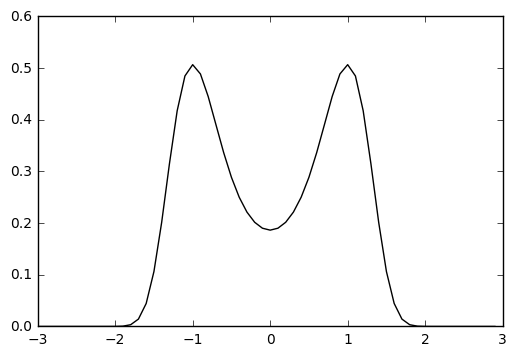

In [26]:
xGrid = np.arange(-3., 3., xStep)
y = np.exp( - U(xGrid) )
y = y / (np.sum(y) * xStep)
plt.plot(xGrid,y, '-k')


In [19]:
samples = np.zeros(nsample)
x = 0.
for i in range(nsample):
    x = sghmc_scalar( U, gradU, m, dt, nstep, x, C, V )
    samples[i] = x



In [21]:
yhmc = scipy.stats.histogram(samples, numbins=len(xGrid), defaultlimits=(-3.,3.))[0]
yhmc = yhmc / (np.sum(yhmc) * xStep)

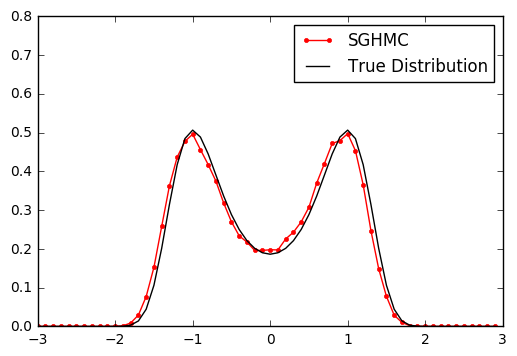

In [29]:
plt.plot(xGrid,yhmc, '.-r', label='SGHMC')
plt.plot(xGrid,y, '-k', label='True Distribution')
plt.ylim(0.0,0.8)
plt.legend()

In [23]:
x = 0.

In [24]:
%timeit -n2 -r4 sghmc_scalar(U, gradU, m, dt, nstep, x, C, V)

2 loops, best of 4: 102 µs per loop
